In [1]:
# auto reload packages
%load_ext autoreload
%autoreload 2
# import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import local packages
import toroidal_physics_absolute as tp

In [2]:
# Try to mimic Earth's situation, with Earth's mass and density used to decide the geometry of the torus
# Torus's volume = 2*pi*R*pi*r^2 = 2*(pi)^2*R*r*r
# Option 1: setting r_major = Earth's radius -> r_minor=sqrt(2/3/pi)*R_e
# Option 2: preserving volume only, and define an aspect ratio

# some Earth's properties
r_e=6_378e3
omega = 2*np.pi / 24 / 3600 * 5 # 1 rotation per day

# decide options for setting up the torus
option='2'
aspect_ratio = 0.05 # change it if you are using option 2 or 3
if option=='1':
    r_major = r_e
    r_minor = np.sqrt(2.0/3.0/np.pi)* r_e
    aspect_ratio = r_minor/r_major 
if option=='2':
    r_minor = np.cbrt(2.0*aspect_ratio/3.0/np.pi)*r_e
    r_major = r_minor / aspect_ratio
    omega = omega * r_e / r_major
if option=='3':
    r_minor =  r_e
    r_major =  r_minor / aspect_ratio

#g_0 = 9.81 # m/s^2 (gravitational acceleration at the equator)
print("r_major (km): ",r_major/1e3)
print("r_minor (km): ",r_minor/1e3)
print("aspect ratio: ",aspect_ratio)

r_major (km):  28030.06692996371
r_minor (km):  1401.5033464981855
aspect ratio:  0.05


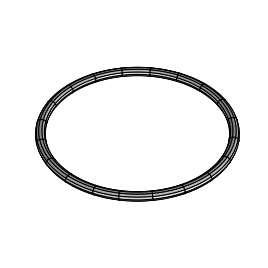

In [3]:
# Illustrate a torus with desired aspect ratio
n = 100

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 1, aspect_ratio
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_zlim(-1,1)
ax1.plot_surface(x, y, z, rstride=5, cstride=10, color='w', edgecolors='k')
ax1.view_init(40,10)
# hide axis
ax1.set_axis_off()
# aspect ratio
ax1.set_aspect('auto')
# zoom in
ax1.dist = 7

In [4]:
# Calculate the gravitational field on the torus and the gravitational potential distribution

# for gravitational potential distribution
n_rmin=10 # divide r_minor by n_rmin times to get dr
m_rmin=10 # calculate potential up to m_rmin times of r_minor from centre of torus tube
r_minort=np.linspace(r_minor/n_rmin,m_rmin*r_minor,n_rmin*m_rmin)
angle=np.linspace(0,2*np.pi,500)

r_t,z_t=tp.toroidal3d2cylindrical(angle,r_major,r_minort)
g_rt,g_zt,v_g=tp.toroidal_gravity(r_t,z_t,r_major,r_minor,potential=True)
print(g_rt.min(),g_zt.max())
print(np.argwhere(g_rt==g_rt.min()))

-105.83834544392847 105.38386305774968
[[  0   0]
 [  0 499]]


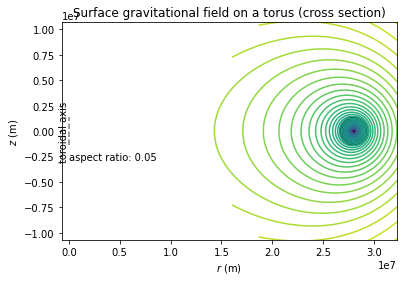

In [5]:
plt.plot(r_t[n_rmin-1,:],z_t[n_rmin-1,:],'k-', alpha=0.5)
plt.plot(r_major,0,'k.')
plt.plot([0,0],[-r_minor,r_minor],'k--', alpha=0.5)
plt.quiver(r_t[n_rmin-1,::10],z_t[n_rmin-1,::10],g_rt[n_rmin-1,::10],g_zt[n_rmin-1,::10])
# plt.quiver(r,z,centrifugal_r,0)
plt.contour(r_t,z_t,v_g,levels=np.linspace(v_g.min(),v_g.max(),50))
plt.axis('equal')
plt.xlabel(r'$r$ (m)')
plt.ylabel(r'$z$ (m)')
plt.title('Surface gravitational field on a torus (cross section)')
plt.text(-0.02,0,'toroidal axis', ha='right', va='center', 
rotation=90)
# plt.xlim((-0.15,1.6))
plt.xlim((-0.5*r_minor,r_major+3*r_minor))
plt.ylim((-1.5*r_minor,1.5*r_minor))
# add quiver scaling
# plt.quiver(0.2,-0.4,0.1,0)
plt.text(0.2,-1.5*r_minor,'aspect ratio: '+"{:.2f}".format(aspect_ratio), ha='left', va='top',rotation=0)

plt.savefig('toroidal_gravity.png', dpi=300, bbox_inches='tight')

(-2102255.019747278, 2102255.019747278)

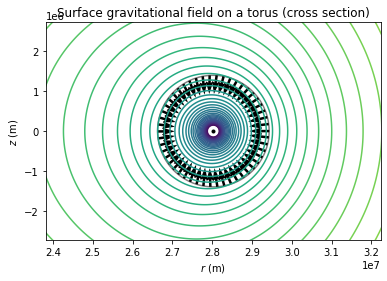

In [6]:
plt.plot(r_t[n_rmin-1,:],z_t[n_rmin-1,:],'k-', alpha=0.5)
plt.plot(r_major,0,'k.')
plt.plot([0,0],[-r_minor,r_minor],'k--', alpha=0.5)
plt.quiver(r_t[n_rmin-1,::10],z_t[n_rmin-1,::10],g_rt[n_rmin-1,::10],g_zt[n_rmin-1,::10])
# plt.quiver(r,z,centrifugal_r,0)
plt.contour(r_t,z_t,v_g,levels=np.linspace(v_g.min(),v_g.max(),50))
plt.axis('equal')
plt.xlabel(r'$r$ (m)')
plt.ylabel(r'$z$ (m)')
plt.title('Surface gravitational field on a torus (cross section)')
#plt.text(-0.02,0,'toroidal axis', ha='right', va='center', 
#rotation=90)
# plt.xlim((-0.15,1.6))
plt.xlim((r_major-3*r_minor,r_major+3*r_minor))
plt.ylim((-1.5*r_minor,1.5*r_minor))
# add quiver scaling
# plt.quiver(0.2,-0.4,0.1,0)
#plt.text(0.2,-1.5*r_minor,'aspect ratio: '+"{:.2f}".format(aspect_ratio), ha='left', va='top',rotation=0)

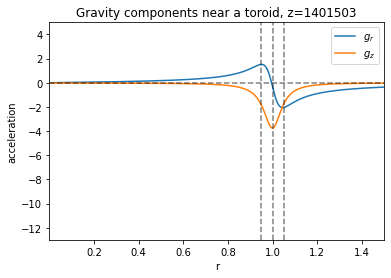

In [7]:
ri=np.linspace(1,r_major+10*r_minor,1000)
zi=r_minor
gri,gzi,vgi=tp.toroidal_gravity(ri,zi,r_major,r_minor,potential=True)
plt.plot(ri/r_major, gri , label="$g_r$")
plt.plot(ri/r_major, gzi, label="$g_z$")
# y=0 line
plt.plot(ri/r_major, np.zeros(len(ri)), 'k--', alpha=0.5)
# x=1 line
plt.plot(np.ones(100), np.linspace(-15,15,100), 'k--', alpha=0.5)
# x=1 line
plt.plot(np.ones(100)+r_minor/r_major, np.linspace(-15,15,100), 'k--', alpha=0.5)
plt.plot(np.ones(100)-r_minor/r_major, np.linspace(-15,15,100), 'k--', alpha=0.5)

plt.xlim(np.min(ri/r_major), np.max(ri/r_major))
plt.ylim(-13,5)

# plt.plot(r, a_theta, label="a_theta")
# plt.plot(r, a_simple, label="a_simple")
# plt.ylim(-10,10)
plt.xlabel("r")
plt.ylabel("acceleration")
plt.title("Gravity components near a toroid, z="+"{:5.0f}".format(zi))

plt.legend()
plt.savefig("gravity_near_toroid.png", dpi=300)

In [8]:
g_t_r, g_t_theta = tp.vector_cylindrical2toroidal(angle, g_rt[n_rmin-1,:], g_zt[n_rmin-1,:])

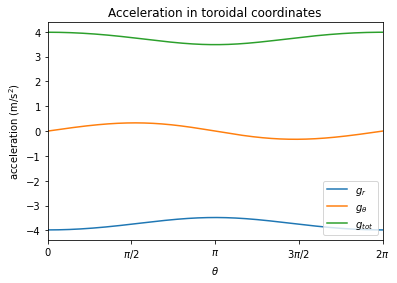

In [9]:
plt.plot(angle, g_t_r, label='$g_r$')
# plt.plot((phi+0.5*phi[1]-phi[0])[:-1], 0.5 * (g_t_r[1:] + g_t_r[:-1]), 'k.')

plt.plot(angle, g_t_theta, label=r'$g_{\theta}$')
plt.plot(angle, np.sqrt(np.square(g_t_r) + np.square(g_t_theta)), label="$g_{tot}$")
plt.legend(loc='lower right')
plt.xlabel(r'$\theta$')
plt.ylabel('acceleration (m/s$^2$)')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"])
plt.xlim(0, 2 * np.pi)
plt.title('Acceleration in toroidal coordinates')
plt.savefig('surface_gravity_toroidal.png', dpi=300)

0.20146817599860778


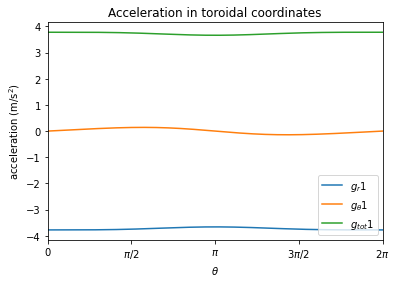

In [10]:
centrifugal_r = tp.centrifugal_acceleration(r_t[n_rmin-1,:], omega)
g_t_r1, g_t_theta1 = tp.vector_cylindrical2toroidal(angle, g_rt[n_rmin-1,:]+centrifugal_r, g_zt[n_rmin-1,:])
print(centrifugal_r.max())
plt.plot(angle, g_t_r1, label='$g_r1$')
# plt.plot((phi+0.5*phi[1]-phi[0])[:-1], 0.5 * (g_t_r[1:] + g_t_r[:-1]), 'k.')

plt.plot(angle, g_t_theta1, label=r'$g_{\theta}1$')
plt.plot(angle, np.sqrt(np.square(g_t_r1) + np.square(g_t_theta1)), label="$g_{tot}1$")
plt.legend(loc='lower right')
plt.xlabel(r'$\theta$')
plt.ylabel('acceleration (m/s$^2$)')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"])
plt.xlim(0, 2 * np.pi)
plt.title('Acceleration in toroidal coordinates')
plt.savefig('surface_gravity_toroidal.png', dpi=300)